# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [2]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873
1,South Michelleport,3/04/19 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178
4,South Jack,3/06/19 4:28,34.58,3908451377344
5,South Latoya,3/11/19 12:26,9.52,1994999424437
6,New Paulville,2/27/19 11:17,43.25,793208410091
7,Simpsonburgh,4/26/19 0:43,35.98,111953927754
8,South Karenland,1/08/19 3:28,35.09,7995623208694
9,North Jasmine,3/09/19 6:26,42.81,5327642267789


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/04/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/06/19 4:28,34.58,3908451377344,46,Urban


In [4]:
# Get the unique values of the type of city.
city_types= city_data_df["type"].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [6]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [7]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [8]:
# 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [9]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [10]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [11]:
#  3. Get the total amount of fares for each city type
urban_total_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_total_fare.head()

city
Amandaburgh        443.55
Barajasview        557.31
Carriemouth        764.49
Christopherfurt    661.55
Deanville          491.01
Name: fare, dtype: float64

In [12]:
suburban_total_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
suburban_total_fare.head()

city
Barronchester    582.76
Bethanyland      593.21
Brandonfort      673.31
Colemanland      679.68
Davidfurt        543.93
Name: fare, dtype: float64

In [13]:
rural_total_fare = rural_cities_df.groupby(["city"]).sum()["fare"]
rural_total_fare.head()

city
Bradshawfurt      400.64
Garzaport          72.37
Harringtonfort    200.82
Jessicaport       216.08
Lake Jamie        206.15
Name: fare, dtype: float64

In [14]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [15]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [16]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [17]:
# 5. Get the average fare per driver for each city type. 
# Urban
urban_fare_per_driver= urban_total_fare/urban_driver_count
urban_fare_per_driver.head()

city
Amandaburgh        36.962500
Barajasview        21.435000
Carriemouth        14.701731
Christopherfurt    16.135366
Deanville          10.020612
dtype: float64

In [18]:
# 5. Get the average fare per driver for each city type. 
# Suburban
suburban_fare_per_driver= suburban_total_fare/suburban_driver_count
suburban_fare_per_driver.head()

city
Barronchester    52.978182
Bethanyland      26.964091
Brandonfort      67.331000
Colemanland      29.551304
Davidfurt        23.649130
dtype: float64

In [19]:
# 5. Get the average fare per driver for each city type. 
# Rural
rural_fare_per_driver= rural_total_fare/rural_driver_count
rural_fare_per_driver.head()

city
Bradshawfurt       57.234286
Garzaport          10.338571
Harringtonfort     50.205000
Jessicaport       216.080000
Lake Jamie         51.537500
dtype: float64

In [20]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [21]:
# Get the count of rides for each city type.
count_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
count_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [22]:
# Get the sum of the fares for each city type.
count_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
count_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [23]:
# Get the average of the fares for each city type.
average_fares_by_type = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fares_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [24]:
# Get the sum of the fares for each city type.
fares_per_driver_by_type = (pyber_data_df.groupby(["type"]).sum()["fare"])/(city_data_df.groupby(["type"]).sum()["driver_count"])
fares_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [25]:
#  6. Create a PyBer summary DataFrame. 
# Create the DataFrame
pyber_summary_df = pd.DataFrame({
    "Total Rides": count_rides_by_type,
    "Total Drivers": count_drivers_by_type,
    "Total Fares": sum_fares_by_type,
    "Average Fare per Rider": average_fares_by_type,
    "Average Fare per Driver": fares_per_driver_by_type})


# pyber_city_ride_summary_df.head()

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Rider,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [26]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Rider,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [27]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Rider"] = pyber_summary_df["Average Fare per Rider"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Rider,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [28]:
# 1. Read the merged DataFrame
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# pyber_data_df= pd.read_csv(city_data_to_load, ride_data_to_load)
pyber_data_df.head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/04/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/06/19 4:28,34.58,3908451377344,46,Urban


In [29]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_dates_by_type = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_dates_by_type.head()

fare
type  date                
Rural 1/01/19 9:45   43.69
      1/02/19 11:18  52.12
      1/03/19 19:51  19.90
      1/04/19 3:31   24.88
      1/06/19 7:38   47.33

In [30]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_dates_by_type= sum_dates_by_type.reset_index()
sum_dates_by_type.head()

,type,date,fare
0,Rural,1/01/19 9:45,43.69
1,Rural,1/02/19 11:18,52.12
2,Rural,1/03/19 19:51,19.90
3,Rural,1/04/19 3:31,24.88
4,Rural,1/06/19 7:38,47.33


In [31]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_dates_by_type= sum_dates_by_type.pivot(index="date", columns="type", values="fare")
sum_dates_by_type.head(10)

type,Rural,Suburban,Urban
date,,,
1/01/19 0:08,NaN,NaN,37.91
1/01/19 0:46,NaN,47.74,NaN
1/01/19 12:32,NaN,25.56,NaN
1/01/19 14:40,NaN,NaN,5.42
1/01/19 14:42,NaN,NaN,12.31
1/01/19 14:52,NaN,31.15,NaN
1/01/19 17:22,NaN,NaN,42.11
1/01/19 21:04,NaN,NaN,11.71
1/01/19 2:07,NaN,24.07,NaN


In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_dates_by_type = sum_dates_by_type.loc['1/01/2019':'4/29/2019']
sum_dates_by_type.head(10)

type,Rural,Suburban,Urban
date,,,
1/02/19 0:13,NaN,44.71,NaN
1/02/19 0:44,NaN,NaN,43.72
1/02/19 0:56,NaN,NaN,37.34
1/02/19 11:18,52.12,NaN,NaN
1/02/19 11:51,NaN,NaN,7.45
1/02/19 14:14,NaN,NaN,13.89
1/02/19 15:38,NaN,45.32,NaN
1/02/19 16:22,NaN,47.07,NaN
1/02/19 16:59,NaN,33.62,NaN


In [33]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
sum_dates_by_type.index= pd.to_datetime(sum_dates_by_type.index)
sum_dates_by_type.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-02 00:13:00,NaN,44.71,NaN
2019-01-02 00:44:00,NaN,NaN,43.72
2019-01-02 00:56:00,NaN,NaN,37.34
2019-01-02 11:18:00,52.12,NaN,NaN
2019-01-02 11:51:00,NaN,NaN,7.45
2019-01-02 14:14:00,NaN,NaN,13.89
2019-01-02 15:38:00,NaN,45.32,NaN
2019-01-02 16:22:00,NaN,47.07,NaN
2019-01-02 16:59:00,NaN,33.62,NaN


In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_dates_by_type.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2019-01-02 00:13:00 to 2019-04-29 07:50:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     115 non-null    float64
 1   Suburban  572 non-null    float64
 2   Urban     1508 non-null   float64
dtypes: float64(3)
memory usage: 68.5 KB


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_dates_week_by_type= sum_dates_by_type.resample("W").sum()
sum_dates_week_by_type.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,144.23,593.08,1533.90
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [36]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

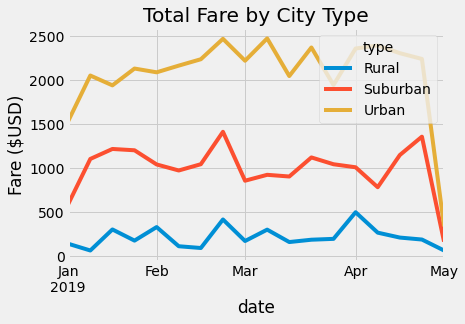

In [37]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

sum_dates_week_by_type.plot()
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.grid(True)
plt.show()